In [1]:
import DSGRN

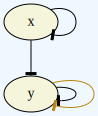

In [2]:
net_spec = 'x : -x\n y : - y - x y'

network = DSGRN.Network(net_spec, 'Ecology')

DSGRN.DrawGraph(network)

In [3]:
print('inputs:', network.inputs(0), network.inputs(1))
print('outputs:', network.outputs(0), network.outputs(1))
print('logics:', network.logic(0), network.logic(1))

inputs: [0] [1, 0, 1]
outputs: [0, 1] [1, 1]
logics: [[0]] [[1], [0, 1]]


In [4]:
network.domains()

[3, 3]

In [5]:
parametergraph = DSGRN.ParameterGraph(network)

In [6]:
print("There are " + str(parametergraph.size()) + " nodes in the parameter graph.")

There are 24 nodes in the parameter graph.


In [7]:
database_fname = 'morse_database_all.json'

# Save the whole parameter graph
DSGRN.save_morse_graph_database_json(network, database_fname)

In [8]:
par_index = 1

In [9]:
parameter = parametergraph.parameter(par_index)

In [10]:
print(parameter)

[["x",[1,2,"C"],[0,1]],["y",[3,2,"CCCC"],[0,1]]]


In [11]:
# Get parameter inequalities
par_inequalities = DSGRN.parameter_inequalities(parametergraph, par_index)

for inequality in par_inequalities:
    print(inequality)

x: (p0, T[x->x, 0], T[x->y, 0], p1)
y: (p0, p2, p4, p6, T[y->y, 0], T[y->y, 1], p1, p3, p5, p7)


In [12]:
domaingraph = DSGRN.DomainGraph(parameter)

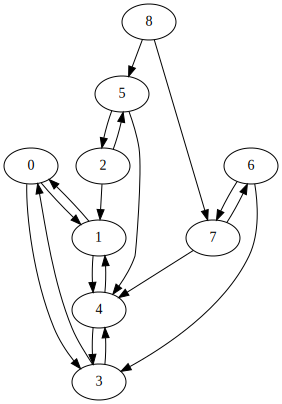

In [13]:
DSGRN.DrawGraph(domaingraph)

In [14]:
morsedecomposition = DSGRN.MorseDecomposition(domaingraph.digraph())

In [15]:
morsegraph = DSGRN.MorseGraph(domaingraph, morsedecomposition)

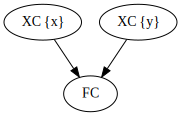

In [16]:
DSGRN.DrawGraph(morsegraph)

In [17]:
network = DSGRN.Network('x0 : -x0 - x0 x1\n x1 : - x1 - x1 x0', 'Ecology')

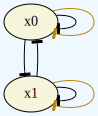

In [18]:
DSGRN.DrawGraph(network)

In [19]:
print('inputs:', network.inputs(0), network.inputs(1))
print('outputs:', network.outputs(0), network.outputs(1))
print('logics:', network.logic(0), network.logic(1))

inputs: [0, 0, 1] [1, 0, 1]
outputs: [0, 0, 1] [0, 1, 1]
logics: [[0], [0, 1]] [[1], [0, 1]]


In [20]:
network.domains()

[4, 4]

In [21]:
parametergraph = DSGRN.ParameterGraph(network)

In [22]:
print("There are " + str(parametergraph.size()) + " nodes in the parameter graph.")

There are 5184 nodes in the parameter graph.


In [23]:
database_fname = 'morse_database.json'

# Parameter indices to save on database
param_indices = [0, 1, 3, 7, 9, 2]

DSGRN.save_morse_graph_database_json(network, database_fname, param_indices)

In [24]:
par_index = 1273

In [25]:
parameter = parametergraph.parameter(par_index)

In [26]:
print(parameter)

[["x0",[3,3,"E18618"],[1,0,2]],["x1",[3,3,"FD8618"],[0,2,1]]]


In [27]:
# Get parameter inequalities
par_inequalities = DSGRN.parameter_inequalities(parametergraph, par_index)

for inequality in par_inequalities:
    print(inequality)

x0: (p0, p2, p4, p6, T[x0->x0, 1], T[x0->x0, 0], p1, p3, p5, T[x0->x1, 0], p7)
x1: (p0, p2, p4, T[x1->x0, 0], T[x1->x1, 1], p1, p3, p5, T[x1->x1, 0], p6, p7)


In [28]:
domaingraph = DSGRN.DomainGraph(parameter)

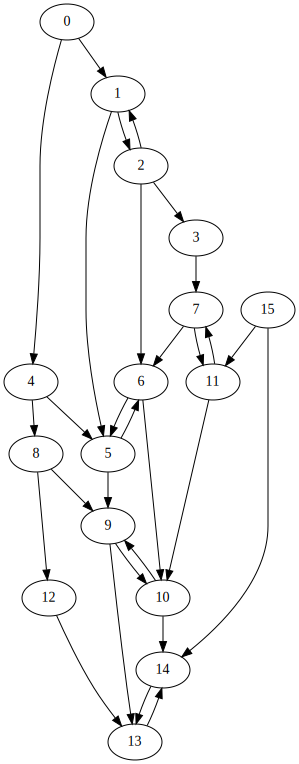

In [29]:
DSGRN.DrawGraph(domaingraph)

In [30]:
morsedecomposition = DSGRN.MorseDecomposition(domaingraph.digraph())

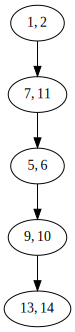

In [31]:
DSGRN.DrawGraph(morsedecomposition)

In [32]:
morsegraph = DSGRN.MorseGraph(domaingraph, morsedecomposition)

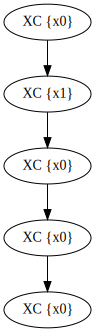

In [33]:
DSGRN.DrawGraph(morsegraph)